---

[Dugo, Giorgio, Piagato, The Multivariate Fractional Ornstein-Uhlenbeck Process](https://arxiv.org/abs/2408.03051) - Theorem 2.4

---

Simplification of the integral 

$$
    I_{ij}(h) = \int_{0}^{h} du \int_{-\infty}^{0} e^{\alpha_i u + \alpha_j v}
    (u-v)^{H_{ij} - 2} dv
$$

where $h,\alpha_{i},\alpha_{j}> 0$ and $H_i,H_j \in (0,1) \setminus \{1/2\}$
with $H_{ij} = H_i + H_j \in (0,2) \setminus \{1\}$.

For $H_{ij} \in (0,2) \setminus \{1\}$, we have

$$
I_{ij}(h)
=
\frac{1}{(\alpha_i+\alpha_j)(H_{ij}-1)}
\Big[
\alpha_j^{1-H_{ij}} e^{(\alpha_i+\alpha_j)h}\,\Gamma\!\left(H_{ij},\alpha_j h\right)
- h^{H_{ij}-1} e^{\alpha_i h}
- \alpha_j^{1-H_{ij}}\Gamma(H_{ij})
+ h^{H_{ij}-1}\,{}_1F_{1}\!\left(H_{ij}-1;\,H_{ij};\,\alpha_i h\right)
\Big],
$$

If $H_{ij} = 2$, it simplifies to

$$
    I_{ij}(h) = \frac{1}{\alpha_i \alpha_j} \left(e^{\alpha_i h} - 1\right)
$$

Without hypergeometric function, this is 

$$
    I_{ij}(h)
=
\int_{0}^{h}
\frac{\alpha_j^{\,1-H_{ij}}}{H_{ij}-1}
\,e^{(\alpha_i+\alpha_j)u}
\left[
\Gamma\!\left(H_{ij},\,\alpha_j u\right)
-
(\alpha_j u)^{H_{ij}-1}e^{-\alpha_j u}
\right]
\,du
$$

In [5]:
%config InlineBackend.figure_format = 'retina'

In [10]:
import numpy as np
from scipy import integrate, special
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams["figure.figsize"] = (8, 6)
sns.set_theme("talk")

In [126]:
def I_closed_form_H_2(h, a_i, a_j):
    "Case H_i + H_j = 2"
    return (np.exp(a_i * h) - 1.0) / (a_i * a_j)


def I_closed_form(h, a_i, a_j, H_i, H_j, opt="closed_form"):
    H_ij = H_i + H_j
    if H_ij < 0 or H_ij > 2:
        raise ValueError("H_i + H_j must be in (0, 2]")
    if H_ij == 2:
        return I_closed_form_H_2(h, a_i, a_j)
    else:
        if opt == "single_integral":
            # single integral form
            def integrand(u):
                return (
                    a_j ** (1 - H_ij)
                    * np.exp((a_i + a_j) * u)
                    * (
                        special.gammaincc(H_ij, a_j * u) * special.gamma(H_ij)
                        - (a_j * u) ** (H_ij - 1) * np.exp(-a_j * u)
                    )
                    / (H_ij - 1)
                )

            return integrate.quad(integrand, 0, h)[0]

        elif opt == "closed_form":
            # closed form
            res = (
                a_j ** (1 - H_ij)
                * np.exp((a_i + a_j) * h)
                * special.gammaincc(H_ij, a_j * h)
                * special.gamma(H_ij)
                - h ** (H_ij - 1) * np.exp(a_i * h)
                - a_j ** (1 - H_ij) * special.gamma(H_ij)
                + h ** (H_ij - 1) * special.hyp1f1(H_ij - 1, H_ij, a_j * h)
            )
            return res / ((a_i + a_j) * (H_ij - 1))
        else:
            raise ValueError("opt must be in {'single_integral', 'closed_form'}")

In [128]:
def I_quad(h, a_i, a_j, H_i, H_j):
    # Numerical double integral using scipy.integrate.quad
    def inner_int_quad(u):
        result, _ = integrate.quad(
            lambda v: np.exp(a_i * u + a_j * v) * (u - v) ** (H_i + H_j - 2), -np.inf, 0
        )
        return result

    return integrate.quad(inner_int_quad, 0, h)[0]

Case $H_i + H_j = 2$

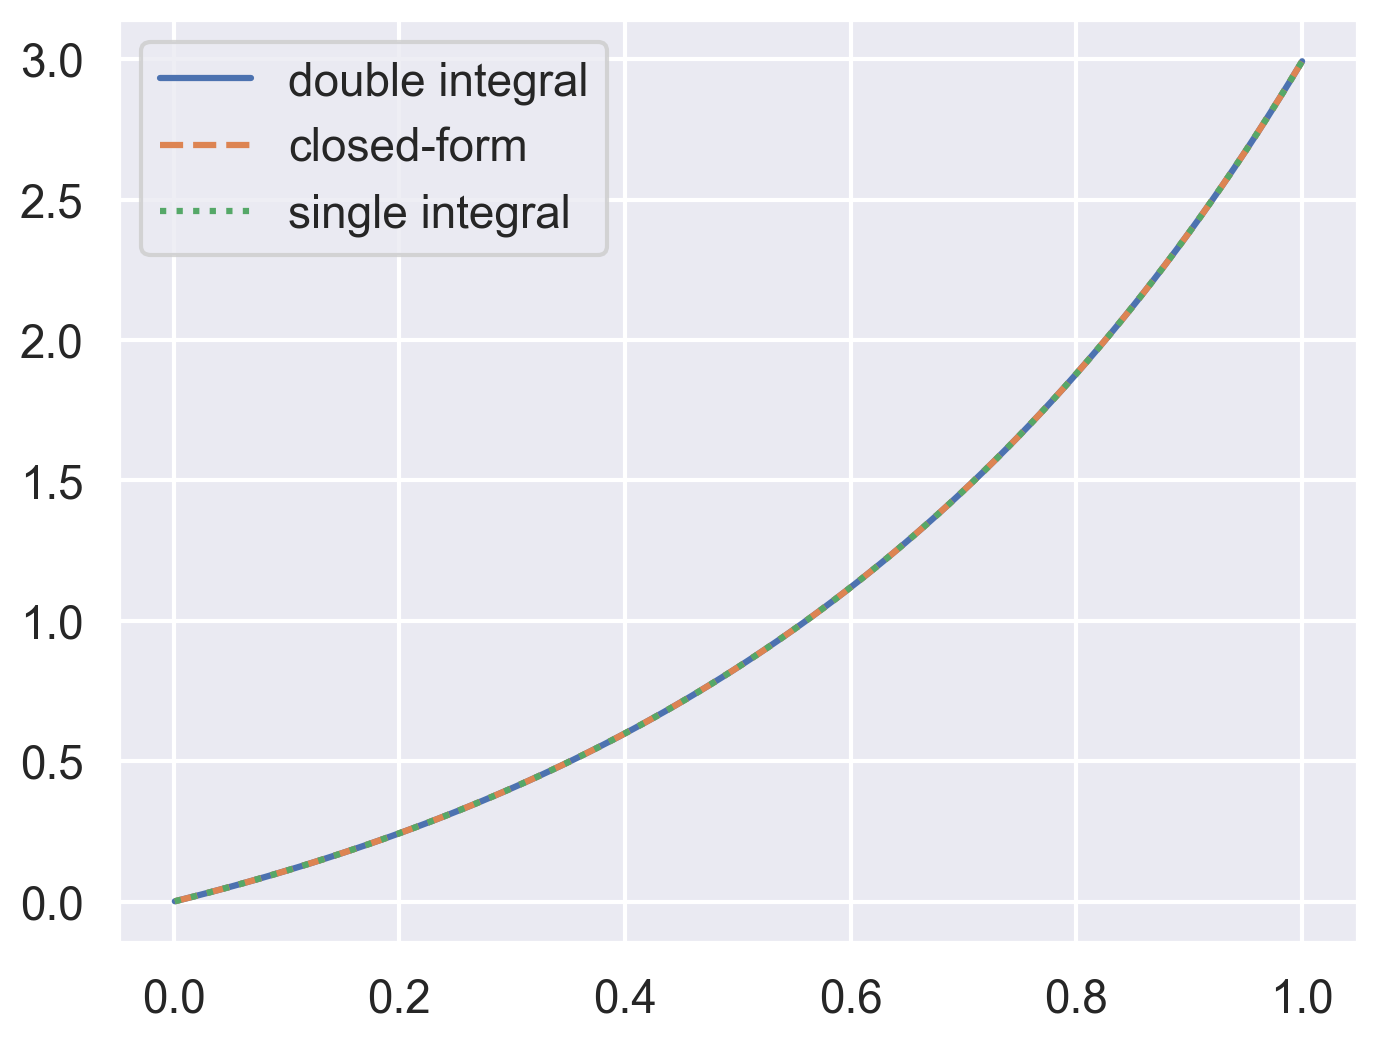

In [135]:
# set parameters
a_i, a_j, H_i, H_j = 1.9, 1.0, 1.0, 1.0
hs = np.linspace(1e-3, 1.0, 100)

if not H_i + H_j == 2:
    raise ValueError("H_i + H_j must be 2")

res_double_integral = np.array([I_quad(h, a_i, a_j, H_i, H_j) for h in hs])
res_closed_form = I_closed_form_H_2(hs, a_i, a_j)
res_single_integral = np.array(
    [I_closed_form(h, a_i, a_j, H_i, H_j, opt="single_integral") for h in hs]
)

# plot
fig, ax = plt.subplots()
ax.plot(hs, res_double_integral, label="double integral")
ax.plot(hs, res_closed_form, "--", label="closed-form")
ax.plot(hs, res_single_integral, ":", label="single integral")
ax.legend()
plt.show()

Case $0 < H_{i} + H_{j} < 1$

/var/folders/cx/lqg_nbts2gd5hgdpftngz4z80000gn/T/ipykernel_83055/1868903464.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = integrate.quad(
/var/folders/cx/lqg_nbts2gd5hgdpftngz4z80000gn/T/ipykernel_83055/1868903464.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(inner_int_quad, 0, h)[0]


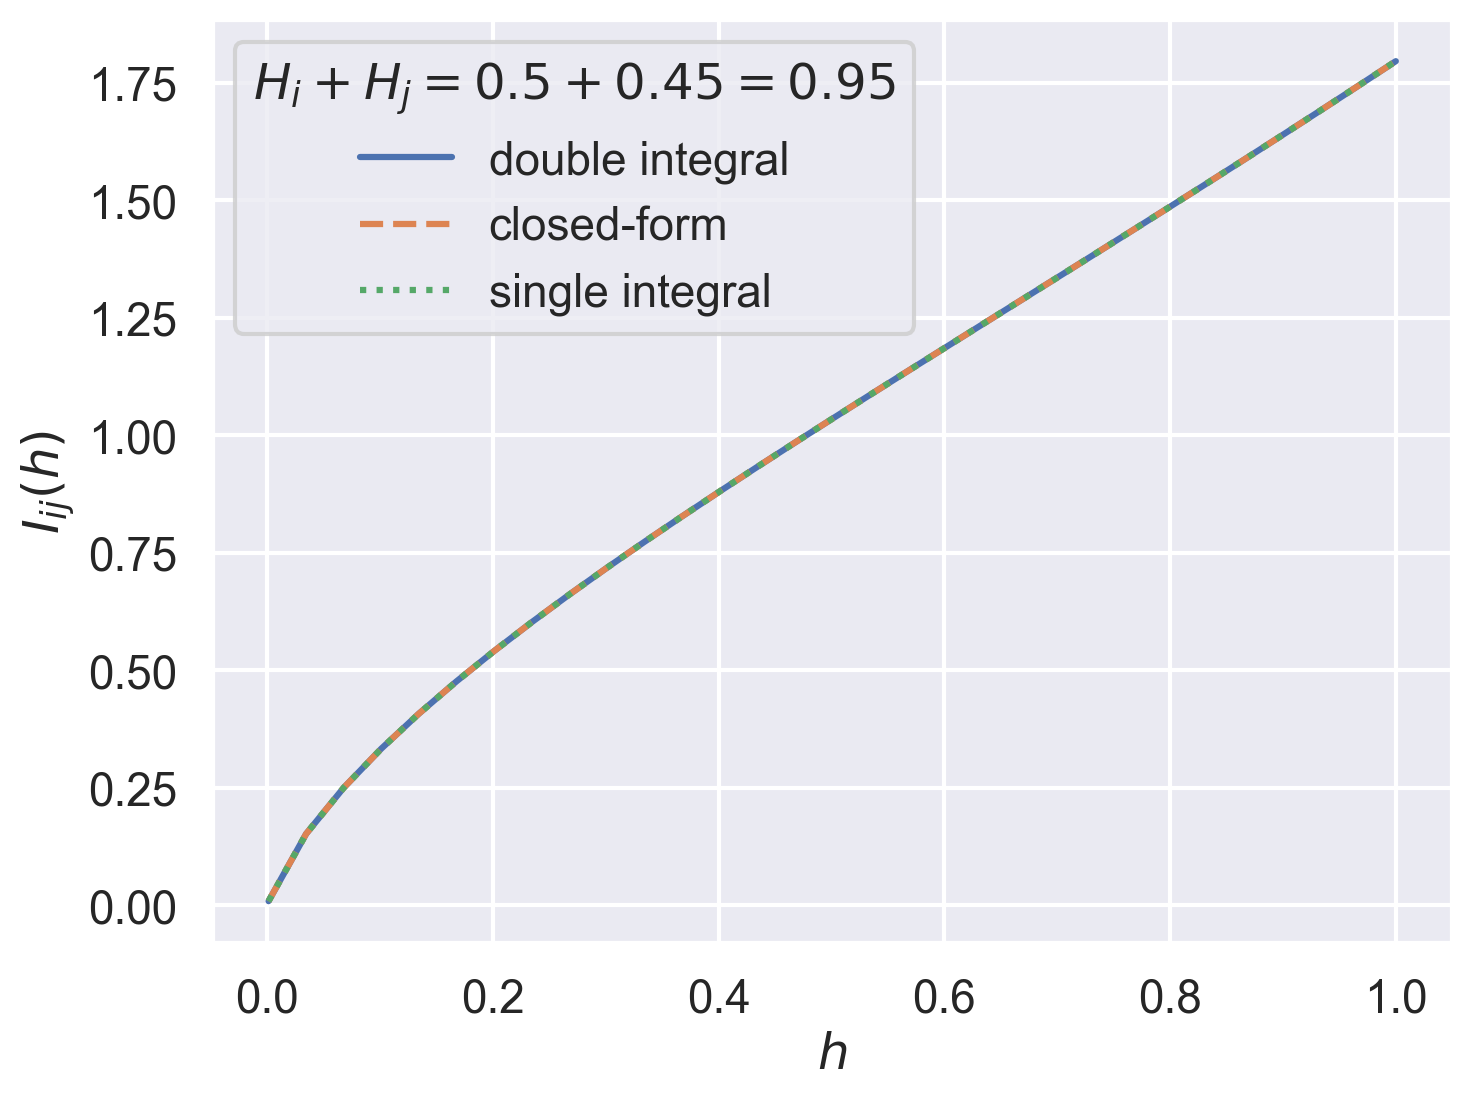

In [136]:
# set parameters
a_i, a_j, H_i, H_j = 1.0, 1.0, 0.5, 0.45

if not H_i + H_j < 1:
    raise ValueError("H_i + H_j must be in (0, 1)")

hs = np.linspace(1e-3, 1.0, 31)
res_double_integral = np.array([I_quad(h, a_i, a_j, H_i, H_j) for h in hs])
res_closed_form = np.array([I_closed_form(h, a_i, a_j, H_i, H_j) for h in hs])
res_single_integral = np.array(
    [I_closed_form(h, a_i, a_j, H_i, H_j, opt="single_integral") for h in hs]
)

# plot
fig, ax = plt.subplots()
ax.plot(hs, res_double_integral, label="double integral")
ax.plot(hs, res_closed_form, "--", label="closed-form")
ax.plot(hs, res_single_integral, ":", label="single integral")
ax.set_xlabel("$h$")
ax.set_ylabel(r"$I_{ij}(h)$")
ax.legend(title=rf"$H_i + H_j = {H_i} + {H_j} = {H_i + H_j:.2f}$")
plt.show()

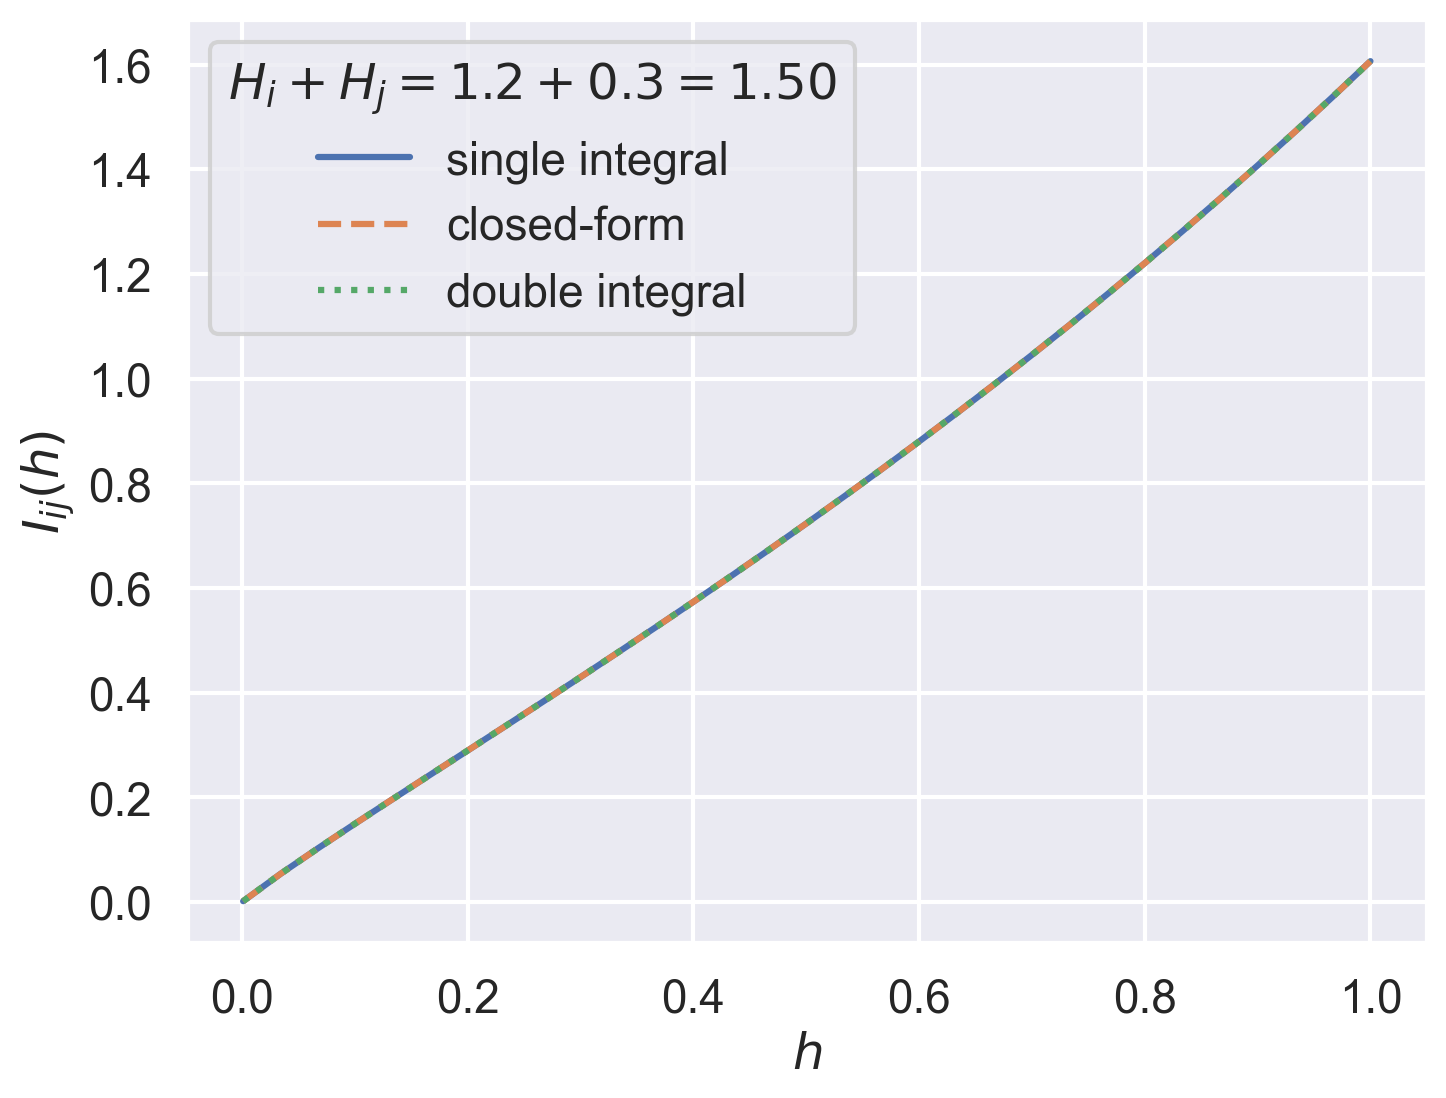

In [137]:
# set parameters

a_i, a_j, H_i, H_j = 1.0, 1.0, 1.2, 0.3
hs = np.linspace(1e-3, 1.0, 31)

if not H_i + H_j > 1:
    raise ValueError("H_i + H_j must be in (1, 2]")

res_single_integral = np.array([I_quad(h, a_i, a_j, H_i, H_j) for h in hs])
res_closed_form = np.array([I_closed_form(h, a_i, a_j, H_i, H_j) for h in hs])
res_double_integral = np.array(
    [I_closed_form(h, a_i, a_j, H_i, H_j, opt="single_integral") for h in hs]
)

# plot
fig, ax = plt.subplots()
ax.plot(hs, res_single_integral, label="single integral")
ax.plot(hs, res_closed_form, "--", label="closed-form")
ax.plot(hs, res_double_integral, ":", label="double integral")
ax.set_xlabel("$h$")
ax.set_ylabel(r"$I_{ij}(h)$")
ax.legend(title=rf"$H_i + H_j = {H_i} + {H_j} = {H_i + H_j:.2f}$")
plt.show()